### Petrol Price : 2 Features

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load data
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')

#Create a new column
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]

# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = data[['Avg_Brent_Crude', 'Ex_Rate']].values, data['Petrol']

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 117 rows
Test Set: 30 rows


# Try Other Linear Algorithms

### 1. Lasso

Lasso() 

MSE: 8299.000886547832
RMSE: 91.09885227898226
R2: 0.9079033179207108


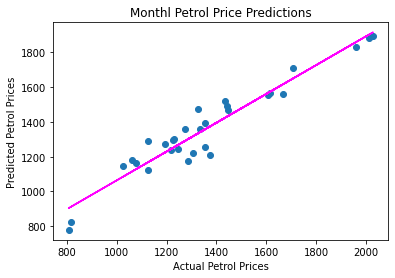

In [2]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Petrol Prices')
plt.ylabel('Predicted Petrol Prices')
plt.title('Monthl Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 2. Decision Tree Algorithm

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 8.87
|   |--- feature_0 <= 92.99
|   |   |--- feature_0 <= 78.13
|   |   |   |--- feature_1 <= 7.59
|   |   |   |   |--- feature_1 <= 7.50
|   |   |   |   |   |--- feature_0 <= 77.10
|   |   |   |   |   |   |--- value: [804.00]
|   |   |   |   |   |--- feature_0 >  77.10
|   |   |   |   |   |   |--- value: [811.80]
|   |   |   |   |--- feature_1 >  7.50
|   |   |   |   |   |--- value: [786.00]
|   |   |   |--- feature_1 >  7.59
|   |   |   |   |--- feature_0 <= 75.46
|   |   |   |   |   |--- feature_1 <= 7.68
|   |   |   |   |   |   |--- value: [826.80]
|   |   |   |   |   |--- feature_1 >  7.68
|   |   |   |   |   |   |--- value: [810.30]
|   |   |   |   |--- feature_0 >  75.46
|   |   |   |   |   |--- value: [844.80]
|   |   |--- feature_0 >  78.13
|   |   |   |--- feature_0 <= 85.45
|   |   |   |   |--- feature_0 <= 80.81
|   |   |   |   |   |--- value: [858.30]
|   |   |   |   |--- feature_0 >  80.81
|   |   |   |   |   |--- feature_1 <= 

MSE: 6441.961333333331
RMSE: 80.2618298653434
R2: 0.928511483129885


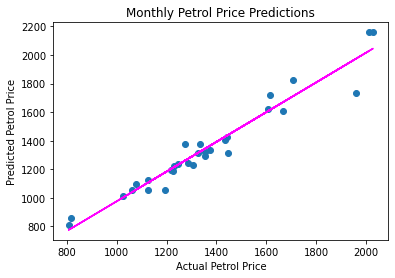

In [4]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Petrol Price')
plt.ylabel('Predicted Petrol Price')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 3. Ensemble Algorithm

RandomForestRegressor() 

MSE: 4157.575370333308
RMSE: 64.47926310321255
R2: 0.9538620488976058


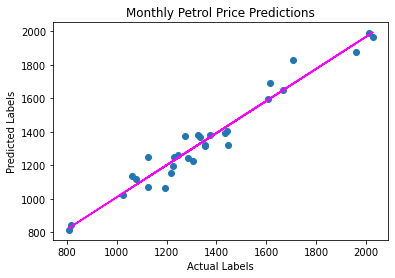

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 4. Gradient Boosting Regression

GradientBoostingRegressor() 

MSE: 2929.334241160509
RMSE: 54.12332437277397
R2: 0.9674922357522053


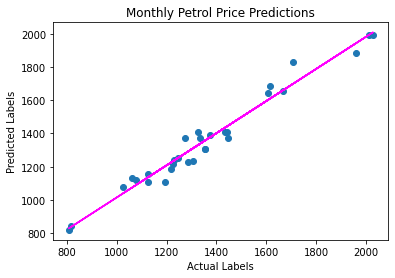

In [6]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Monthly Petrol Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#### Summary

In [12]:
from tabulate import tabulate
import pandas as pd

df = pd.DataFrame({'Lasso' : [8299, 91.01 , 0.9079],
                   'Decision Treee' : [6583 ,81.14, 0.9270],
                   'Ensemble' : [4255, 65.23, 0.9528],
                   'Gradient Boosting' : [2948, 54.30, 0.9673]},
                   index=['MSE', 'RMSE', 'R2'])

#print(tabulate(df, headers='keys', tablefmt='psql'))
print(df.to_markdown()) 

|      |     Lasso |   Decision Treee |   Ensemble |   Gradient Boosting |
|:-----|----------:|-----------------:|-----------:|--------------------:|
| MSE  | 8299      |         6583     |  4255      |           2948      |
| RMSE |   91.01   |           81.14  |    65.23   |             54.3    |
| R2   |    0.9079 |            0.927 |     0.9528 |              0.9673 |


In [ ]:
df.to_html('temp.html')